In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/deep-action-recognition/"
%pip install -r requirements.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/deep-action-recognition


In [2]:
import torch
import torchvision
from utils import *
from skimage.transform import resize
from layers.virtual_radar import VirtualRadar
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['image.cmap'] = 'jet'


In [3]:
# load azure kinect data
data, edges = preprocess_azure_kinect("data/sim_data.json")
data = pad_frames(data, num_pad_frames=550)
data = data.transpose(2, 0, 1)
data = np.expand_dims(data, axis=[0, -1])
data = torch.Tensor(data)

In [14]:
# geenrate spectrogram
virtual_radar = VirtualRadar(edges=edges, wavelength=9e-4, device='cpu')
spectrogram = virtual_radar(data).data.numpy()[0]
print(spectrogram.shape)
spectrogram = resize(spectrogram, (256, 4096))
print(spectrogram.min(), spectrogram.max())

STFT kernels created, time used = 0.0161 seconds
(256, 10141)
-8.872429 7.288475


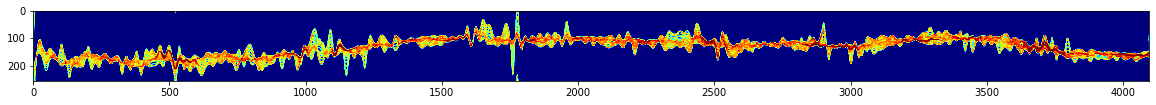

In [15]:
plt.imshow(spectrogram, clim=[0, 4])
plt.savefig('spectrogram', dpi=500, bbox_inches='tight')